---
title: Data Normality 
categories: [Python, Statistic, Experiment]
---

## Intro

This notebook explore: 
    - The R square against normal data
    - Norm data against lag
    - qq plot against normal data

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
plot_params = {'color': '0.75',
 'style': '.-',
 'markeredgecolor': '0.25',
 'markerfacecolor': '0.25',
 'legend': False}

plt.style.use('seaborn-whitegrid')
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

/var/folders/r5/1cdq52mn21zdnqzl0fvp44zw0000gn/T/ipykernel_23399/1354677373.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


#### Explore Effectiveness of Correlation

In [95]:
# explore linear correlation
def foo(x):
    y = x * 3 + 1
    return y

x = np.arange(1, 4)
y = np.apply_along_axis(foo, axis = 0, arr = x)

if ((x - x.mean())**2).sum()/x.shape[0] == x.var():
    print('var is not sqrt-ed variance')
else: 
    print('var is standard deviation')

def corrianda(X, Y):
    c = ((X - X.mean())*(Y - Y.mean())).sum()
    return(c)
def ssd(X):
    c = X.var() * X.shape[0]
    return(c)
def covar(X, Y):
    c = corrianda(x, y) / np.sqrt(ssd(x) * ssd(y))
    return(c)

var is not sqrt-ed variance


In [127]:
x = np.arange(1, 10000)
y = np.apply_along_axis(foo, axis=0, arr = x)
print(f'a perfect line has coefficency of {covar(x, y)}')

a perfect line has coefficency of 1.0


In [96]:
x = np.random.normal(50, 10, 10000)
y = np.apply_along_axis(foo, axis=0, arr = x)
print(f'a standard normal line has coefficency of {covar(x, y)}')

a standard normal line has coefficency of 1.0


In [97]:
x = np.arange(1, 10000)**2
y = np.apply_along_axis(foo, axis=0, arr = x)
print(f'a skewed data(power) has coefficency of {covar(x, y)}')

a skewed data(power) has coefficency of 1.0000000000000002


In [99]:
x = np.log(np.arange(1, 10000))
y = np.apply_along_axis(foo, axis=0, arr = x)
print(f'a skewed data(log) has coefficency of {covar(x, y)}')

a skewed data(log) has coefficency of 0.9999999999999999


#### Fouriers

In [100]:
df = pd.read_csv(
    'data/output/Calenrier_output.csv',
    parse_dates = ['date']
)
df = df.set_index('date').to_period('D')

<Axes: xlabel='date'>

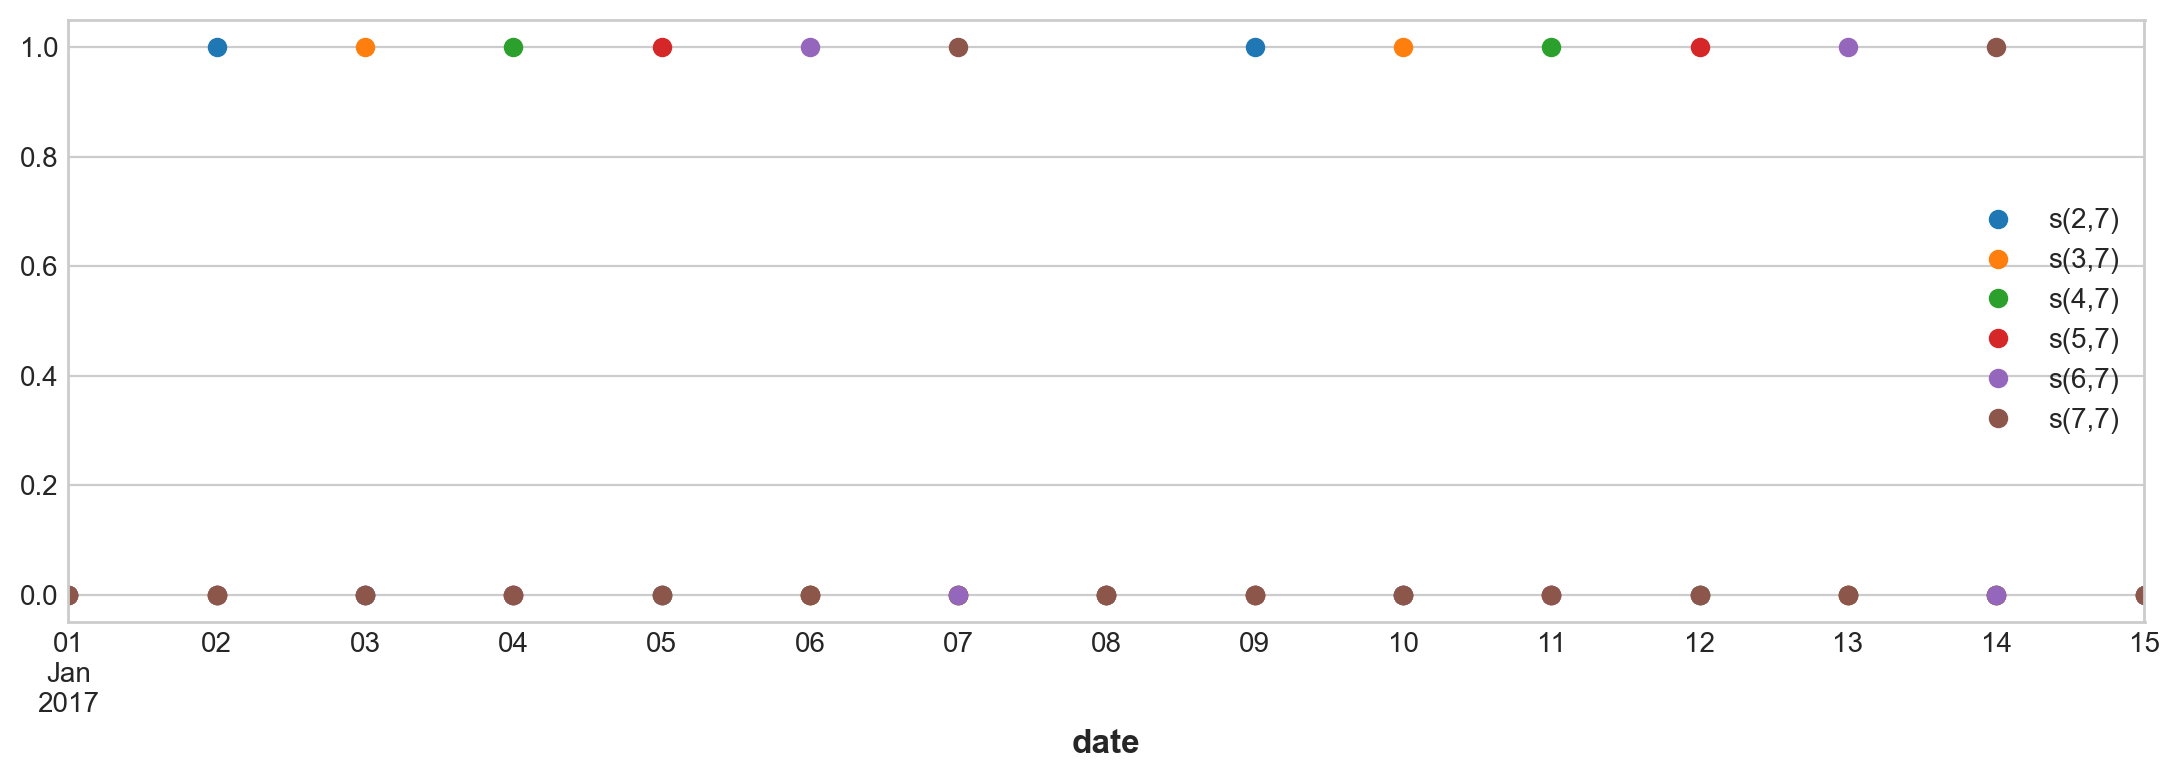

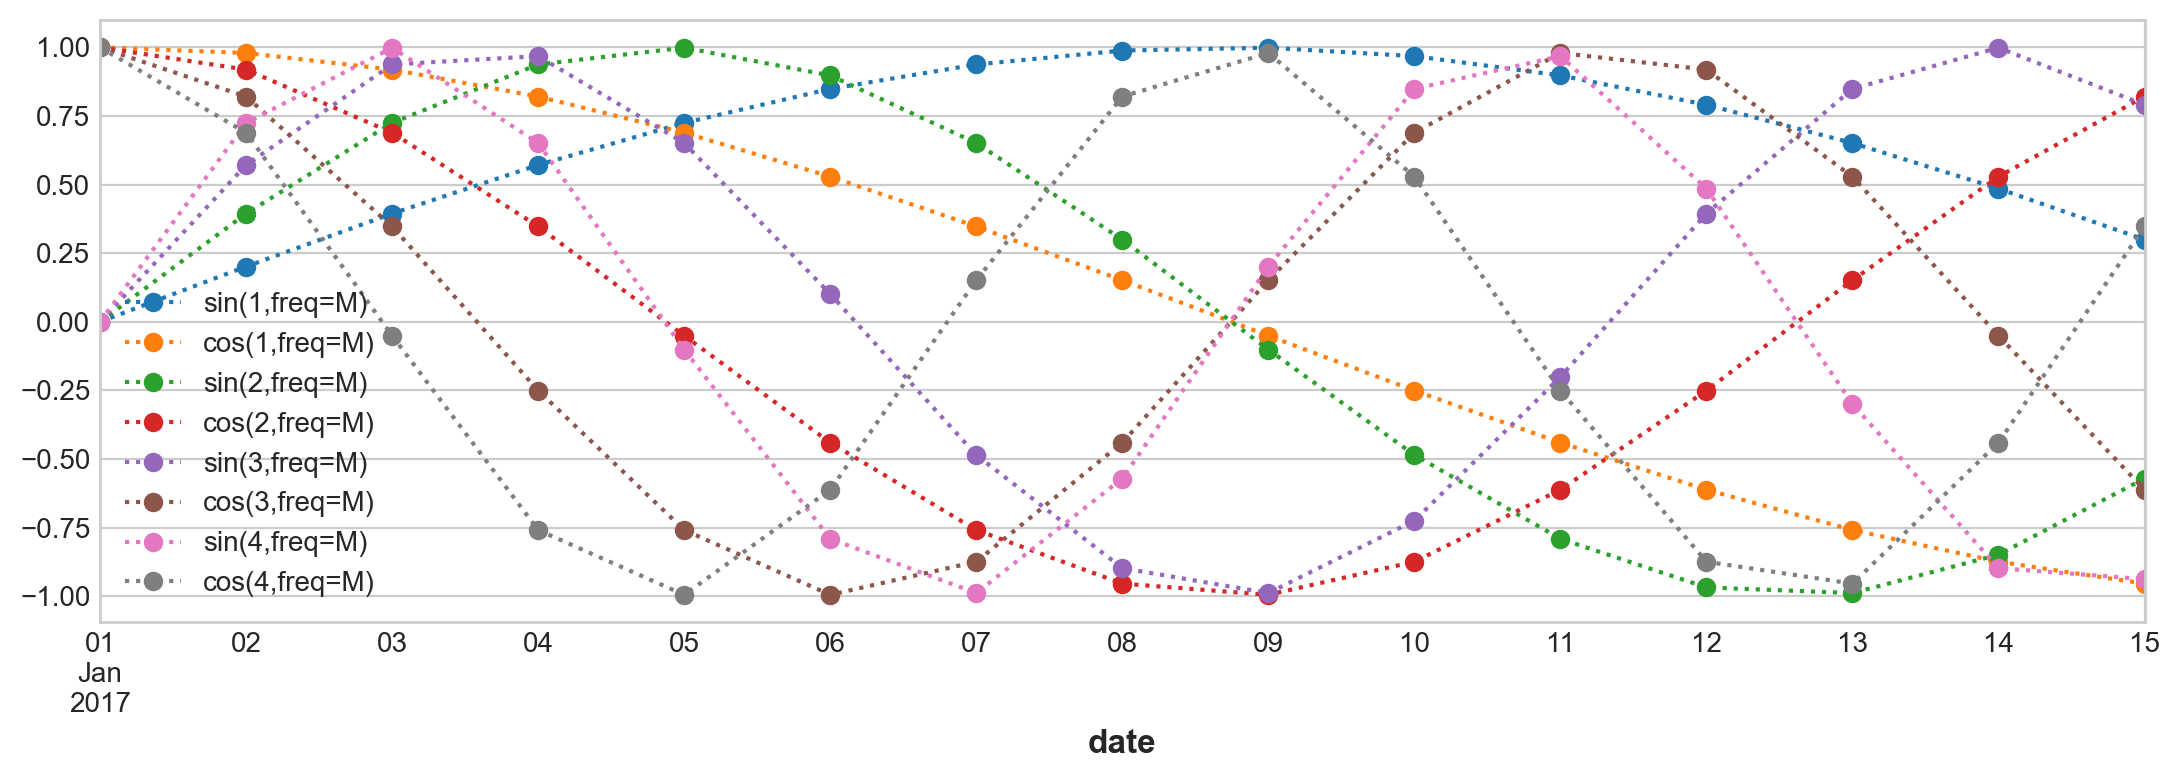

In [101]:
df.filter(regex='s\(\d+,\d+\)').iloc[0:15,:].plot(style = 'o')
df.filter(regex='sin|cos').iloc[0:15,:].plot(style = 'o:')

The s something seems to be modeling week

### Recreate Lag

In [102]:
x = pd.Series(np.random.normal(50, 10, 200))

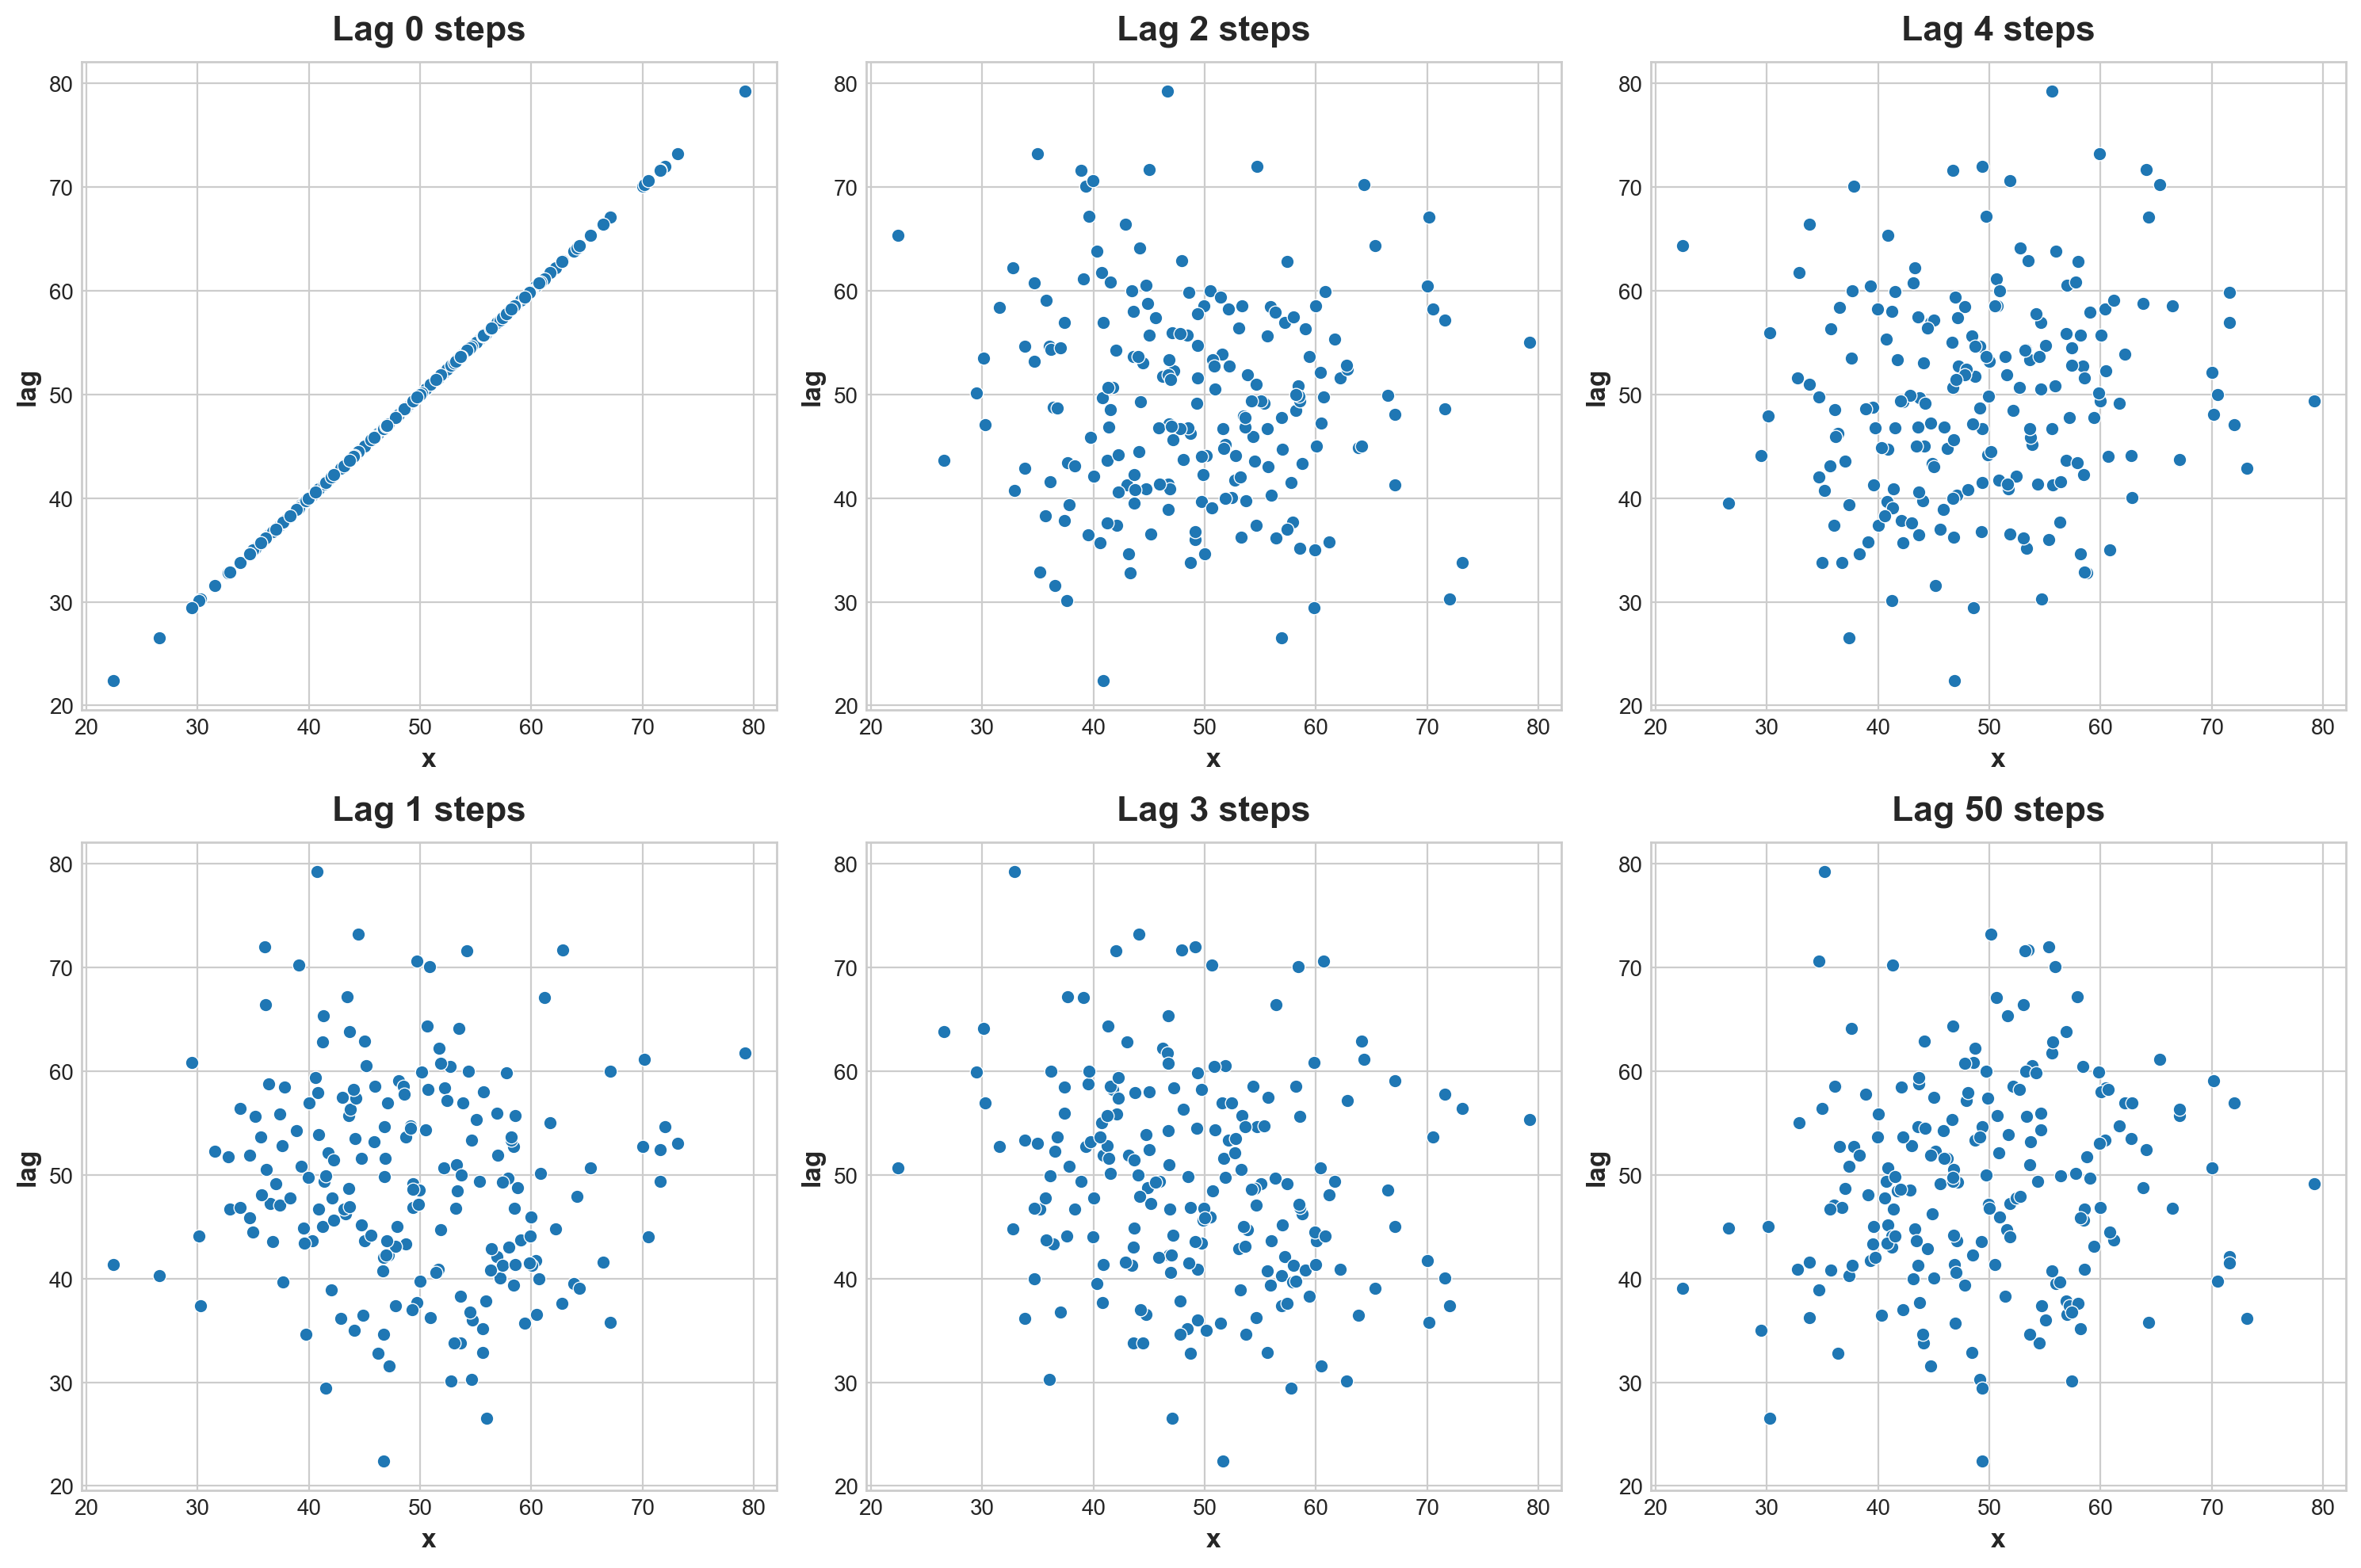

In [104]:
fig, (_) = plt.subplots(2, 3, figsize = (15,10) )
lags = np.append(np.arange(5), 50)
for i in np.arange(len(lags)):
    sns.scatterplot(
        data = pd.DataFrame({"x":x, "lag" :x.shift(i)}),
        x = 'x',
        y = 'lag',
        ax = _[i%2, i//2]
    )
    _[i%2, i//2].set_title(f'Lag {lags[i]} steps')

What I realise about this a normal distributed plot (taking out in random orders) will not have auto-correlatio no matter what. This is because after taking out **a random value**, the distribution is still normal.

Alternatively If I order x and let it leg this results might be very different:

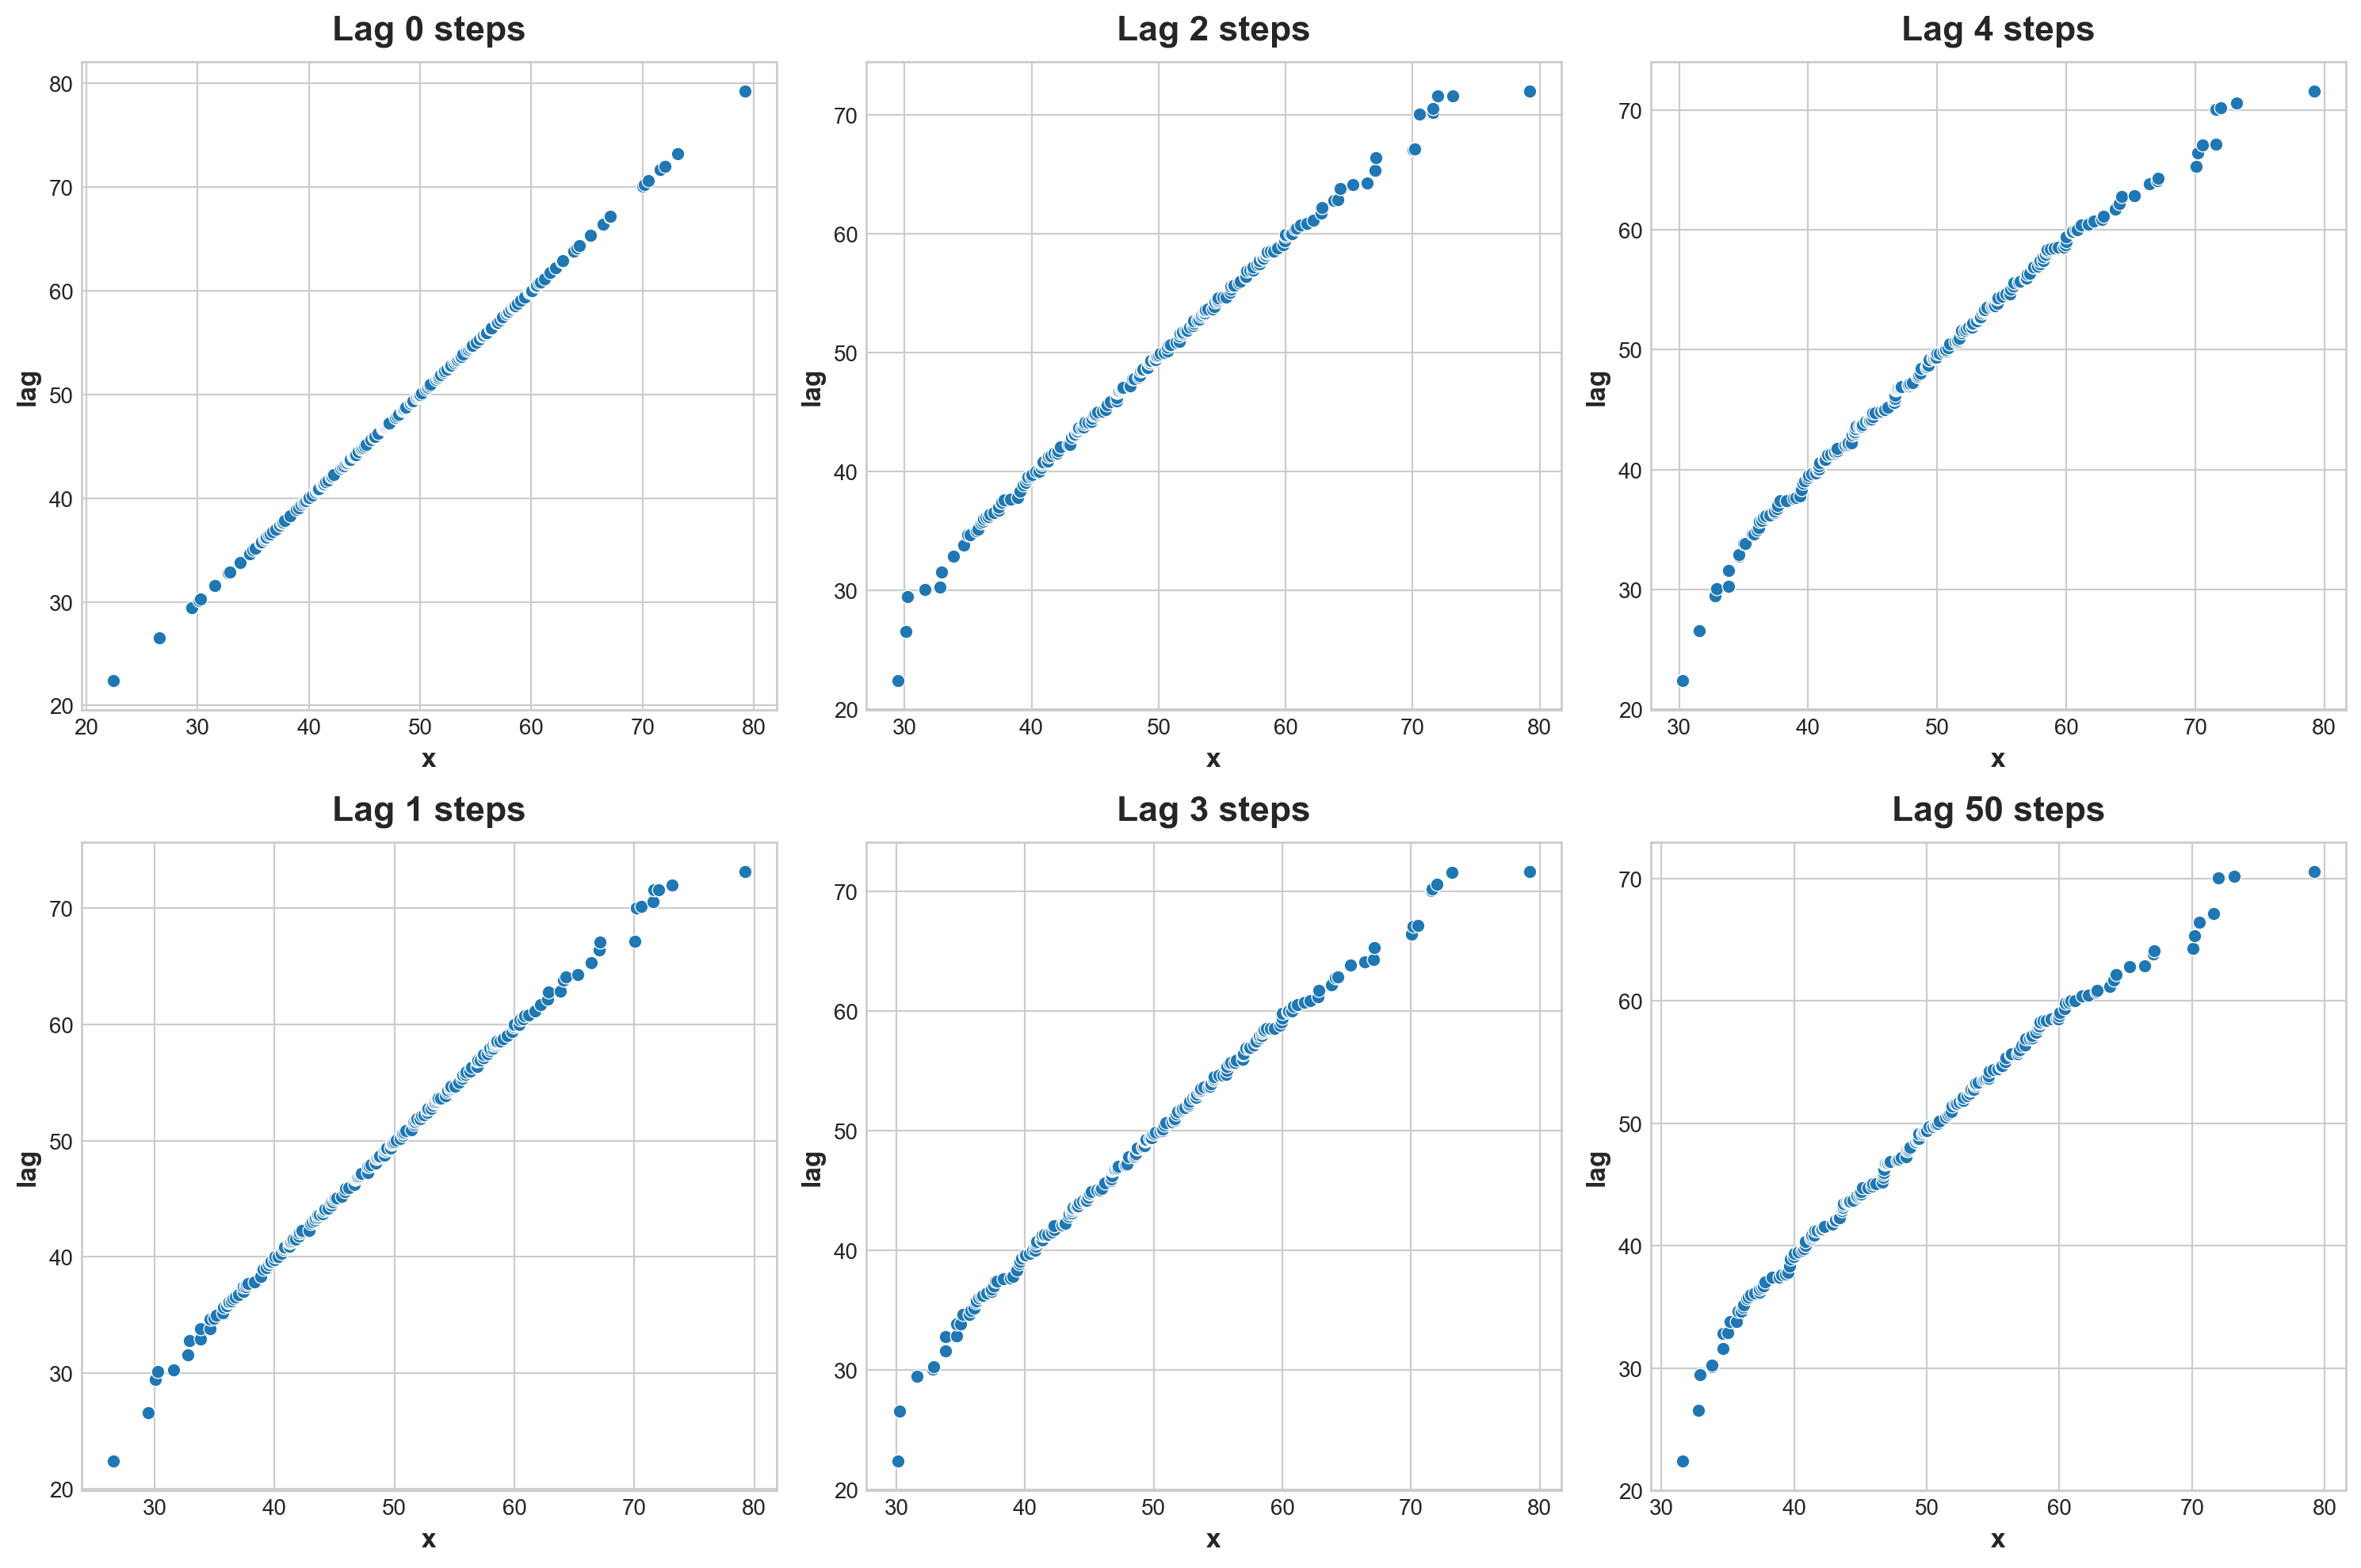

In [103]:
fig, (_) = plt.subplots(2, 3, figsize = (15,10) )
lags = np.append(np.arange(5), 50)
for i in np.arange(len(lags)):
    sns.scatterplot(
        data = pd.DataFrame({"x":x.sort_values(), "lag" :x.sort_values().shift(i)}),
        x = 'x',
        y = 'lag',
        ax = _[i%2, i//2]
    )
    _[i%2, i//2].set_title(f'Lag {lags[i]} steps')

Think of this problem in very extrem ways. At very extrem. The order of a normally distributed variables are extremely random. There will be no pattern to lag at all. 

At the other end, our variable are extremely ordered. There will be near perfect correcation between lag and time. (This correlation will be near one)

For a gross sample that is normal. The slop should only be between 0 to 1. Trimed tail should not affect result here. 

What does it means when any of your is extremely random

I guess what **by looking at distribution of something you really know what is going on underneath**. 

#### Validate if something is normal
Use qqplot

Text(0.5, 1.0, 'trim heads restuls in downward bending')

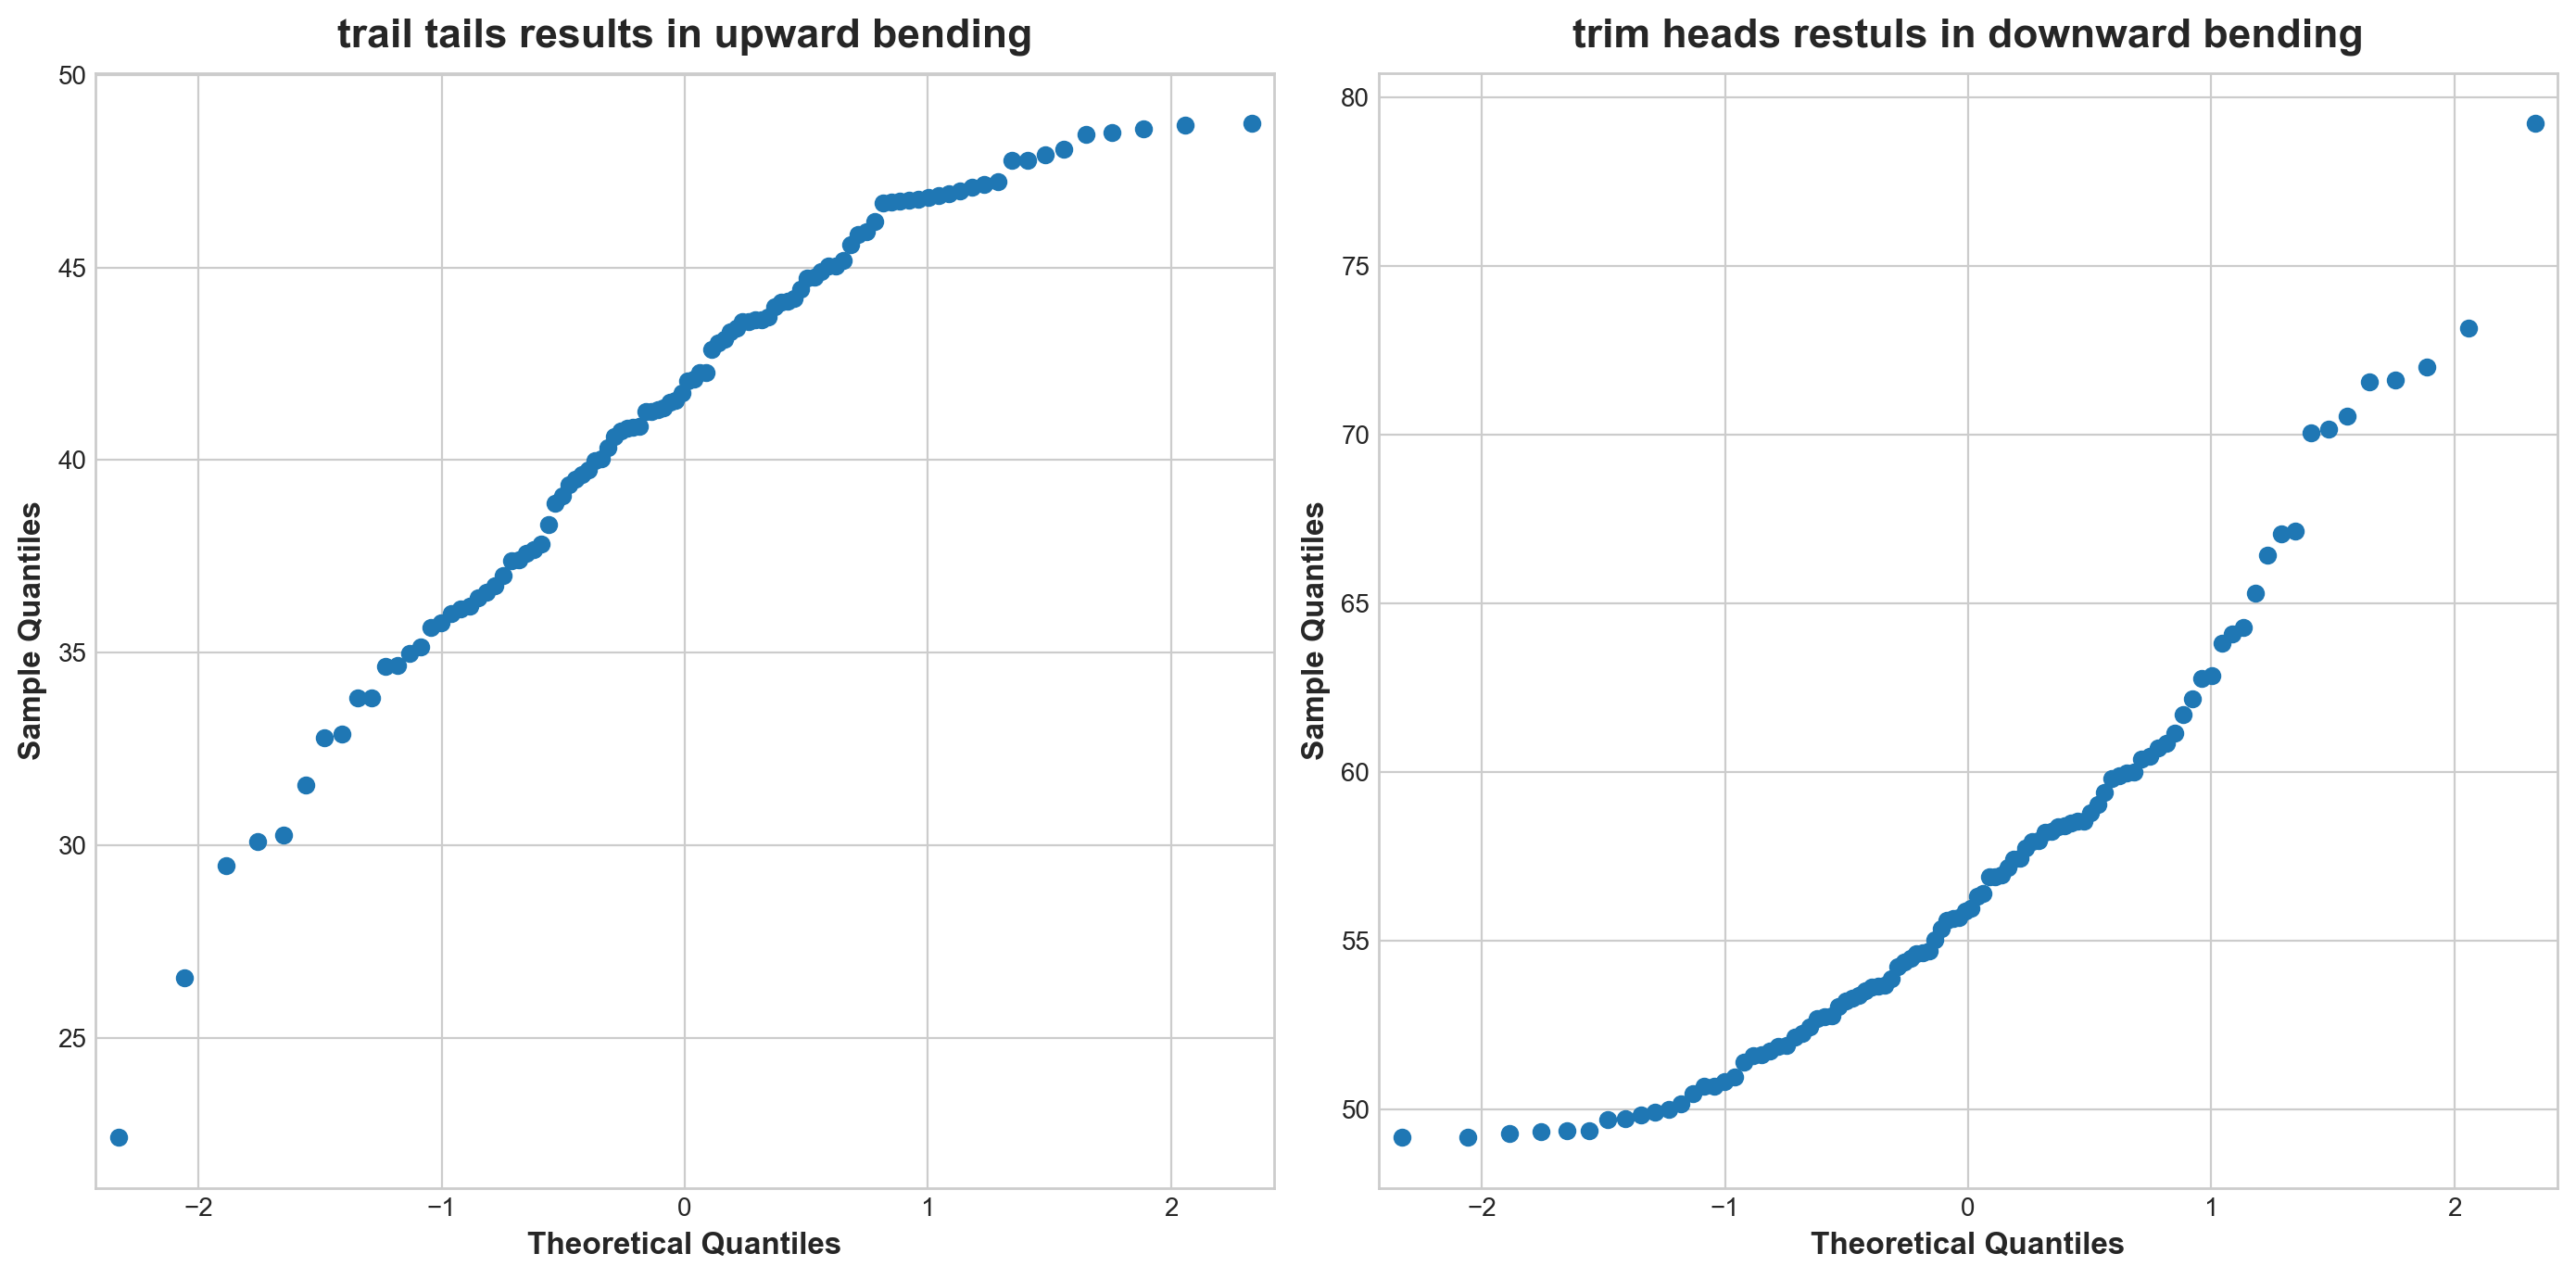

In [110]:
import statsmodels.api as sm
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 7))
sm.qqplot(x.sort_values().head(100), ax=ax1);
ax1.set_title('trail tails results in upward bending')
# trail tails results in upward bending
sm.qqplot(x.sort_values().tail(100), ax=ax2);
ax2.set_title('trim heads restuls in downward bending')
# trim heads restuls in downward bending

Normal data can be abnormal by missing some part. 

#### Statistical Moment Trim of Normalised Data

Text(0.5, 1.0, 'value x to rank plot is a symatric sigmoid curve')

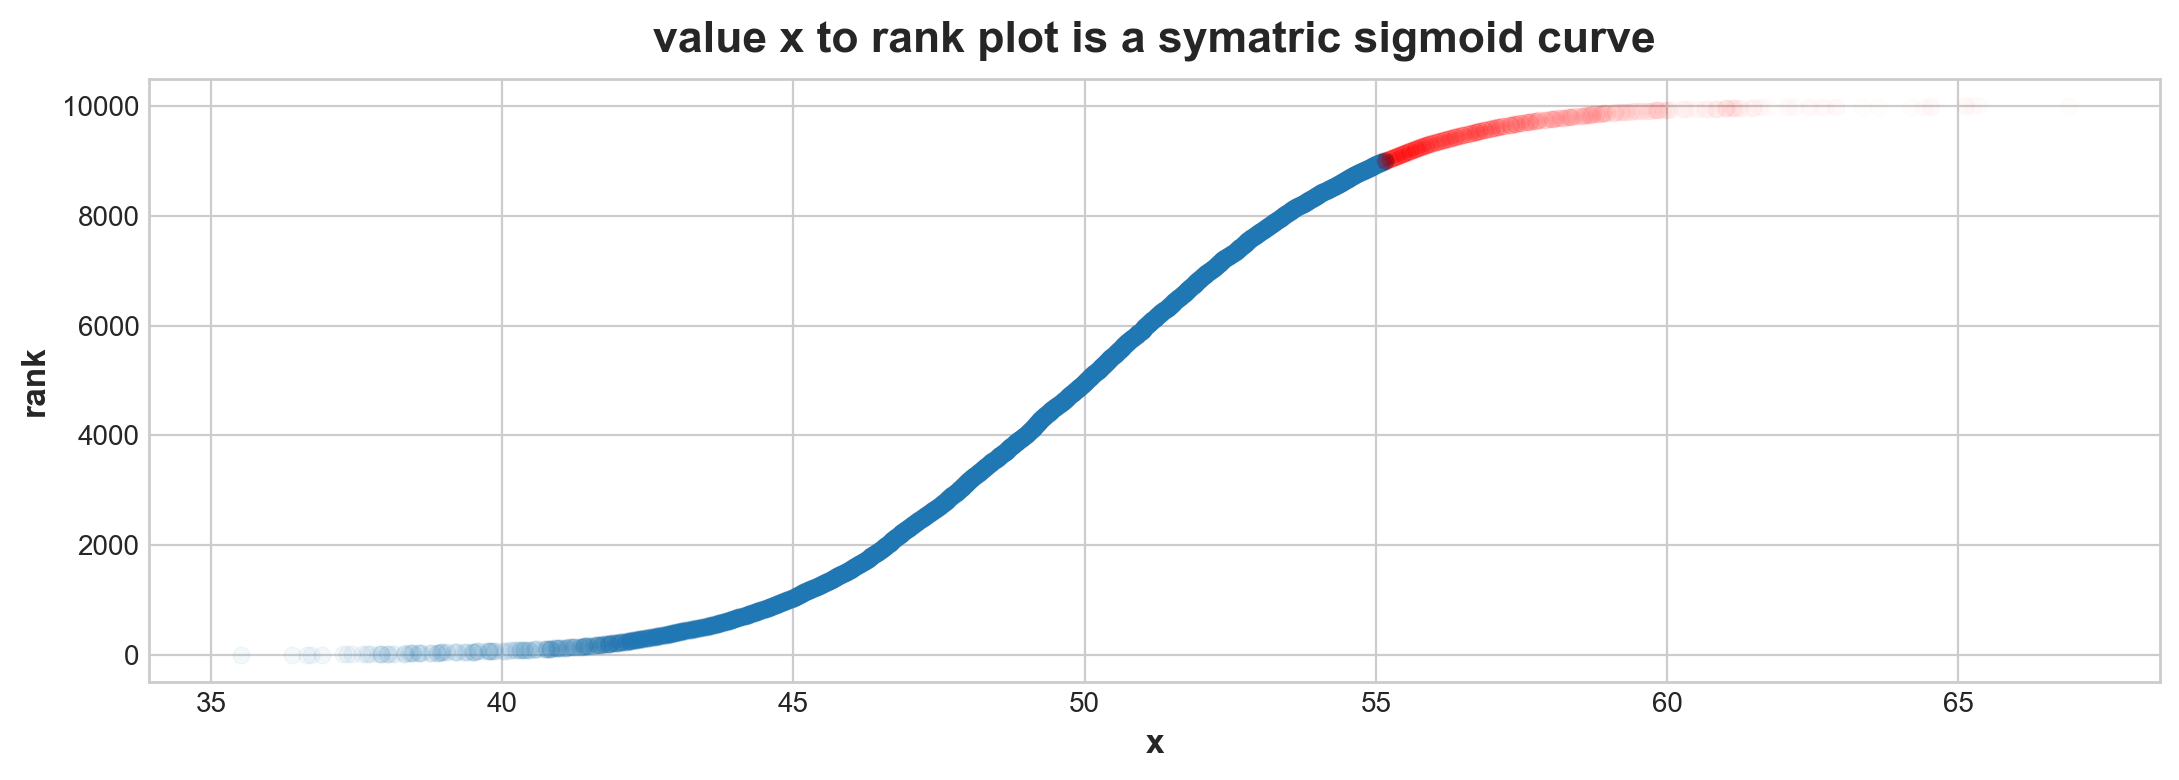

In [47]:
x = np.random.normal(50, 4, 10000)
sx = pd.Series(x).sort_values()
dfx = pd.DataFrame(sx, columns=['x'])
dfx['rank'] = dfx.rank()

dfx_capture = dfx.query('x < x.quantile(0.9)')
dfx_escaped= dfx.query('x >= x.quantile(0.9)')
g = sns.scatterplot(data = dfx_capture, x = 'x', y = 'rank', edgecolor = None, alpha = 0.05)
g = sns.scatterplot(data = dfx_escaped, x = 'x', y = 'rank', edgecolor= None, color = 'red', alpha = 0.01)
g.set_title('value x to rank plot is a symatric sigmoid curve')

Ploting distribution as sigmoid. Should in theory against tail trim. This is useful. In biology experiments, some capture device is not particular good at capturing top 10% escape expert animals. As a result, sample will give us 